In [1]:
import csv
import glob

# Replace '/path/to/directory/' with the actual path to your directory containing the input files
for file_path in glob.glob('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/1000Files/*.txt'):
    # Generate output file name by replacing '.txt' with '.csv'
    output_file_path = file_path.replace('.txt', '.csv')

    with open(file_path, 'r') as input_file, open(output_file_path, 'w', newline='') as output_file:
        # Create a CSV writer object
        writer = csv.writer(output_file)
        
        # Iterate over each line in the input file
        for line in input_file:
            # Split the line into fields using the tab delimiter
            fields = line.strip().split('\t')

            # Write the fields to the CSV file
            writer.writerow(fields)

In [8]:
import pandas as pd
import glob

# Replace '*.csv' with the pattern for your input files
for file_path in glob.glob('*.csv'):
    # Generate output file name by prefixing 'Separate' to the input file name
    output_file_path = 'SeparateProteinIDs' + file_path

    # Read input CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Split the column by '|', but only keep the first two splits if there are more than 2
    split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

    # Rename the new columns
    split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

    # Concatenate the original DataFrame and the new columns
    new_df = pd.concat([df['Q-value'], split_col], axis=1)

    # Write the new DataFrame to a separate CSV file
    new_df.to_csv(output_file_path, index=False)

In [9]:
#double checking the csv files which have separated protein types
df=pd.read_csv('SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_1.csv')
print(df)

        Q-value Protein Type  Protein Uniprot Protein Label
0      0.000610           sp           Q9BT23   LIMD2_HUMAN
1      0.000610           sp           P11021     BIP_HUMAN
2      0.000610           sp           P07237   PDIA1_HUMAN
3      0.000610           sp           P04114    APOB_HUMAN
4      0.000610           sp           P23921    RIR1_HUMAN
...         ...          ...              ...           ...
28218  0.816491      REV__pI  c12riboseqorf96           NaN
28219  0.816555      REV__sp           Q8NFH4   NUP37_HUMAN
28220  0.816619      REV__sp           Q96CX6   LRC58_HUMAN
28221  0.816684      REV__sp         Q5TKA1-2    LIN9_HUMAN
28222  0.816748      REV__sp           Q63HQ0   AP1AR_HUMAN

[28223 rows x 4 columns]


In [10]:
#double checking the csv files which have separated protein types
df=pd.read_csv('SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_2.csv')
print(df)

        Q-value Protein Type Protein Uniprot Protein Label
0      0.000445           sp          P35579    MYH9_HUMAN
1      0.000445           sp          Q9BT23   LIMD2_HUMAN
2      0.000445           sp          P08238   HS90B_HUMAN
3      0.000445           sp          P46821   MAP1B_HUMAN
4      0.000445           sp          P22033    MUTA_HUMAN
...         ...          ...             ...           ...
27823  0.816556      REV__sp          Q96M89   CC138_HUMAN
27824  0.816568      REV__sp      A0A0B4J1V2   HV226_HUMAN
27825  0.816568           sp          Q9H7C4   SYNCI_HUMAN
27826  0.816580      REV__sp          P84090     ERH_HUMAN
27827  0.816580           sp        Q9H0D2-2   ZN541_HUMAN

[27828 rows x 4 columns]


In [11]:
#double checking the csv files which have separated protein types
df=pd.read_csv('SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_3.csv')
print(df)

        Q-value Protein Type Protein Uniprot Protein Label
0      0.000415           sp          P35579    MYH9_HUMAN
1      0.000415           sp          Q92620   PRP16_HUMAN
2      0.000415           sp          P08238   HS90B_HUMAN
3      0.000415           sp          Q14204   DYHC1_HUMAN
4      0.000415           sp          O94886   CSCL1_HUMAN
...         ...          ...             ...           ...
28363  0.822721      REV__sp          Q9H9A7    RMI1_HUMAN
28364  0.822721           sp          Q06495   NPT2A_HUMAN
28365  0.822785      REV__sp          O75752   B3GL1_HUMAN
28366  0.822796      REV__sp          Q9H511   KLH31_HUMAN
28367  0.822796           sp          Q8N6Y1   PCD20_HUMAN

[28368 rows x 4 columns]


In [12]:
import pandas as pd
import os

# Create an empty dictionary to store the counts for each file
file_counts = {}

# Loop through all the CSV files in the directory
for filename in os.listdir():
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filename)
        
        # Split the protein type column into two columns
        df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

        # Count the number of target and decoy proteins
        target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
        decoy_count = df['Protein Type'].str.contains('REV').sum()

        # Add the counts to the dictionary
        file_counts[filename] = {'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
results_df.to_csv('ProteinCounts.csv')

# Print the results for each file
for filename, counts in file_counts.items():
    print(f'File: {filename}, Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_1.csv, Target Proteins: 13974, Decoy Proteins: 6575
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_3.csv, Target Proteins: 13999, Decoy Proteins: 6754
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_2.csv, Target Proteins: 13767, Decoy Proteins: 6579
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_2.csv, Target Proteins: 16369, Decoy Proteins: 6838
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_3.csv, Target Proteins: 16618, Decoy Proteins: 6860
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_1.csv, Target Proteins: 16510, Decoy Proteins: 6722
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_1.csv, Target Proteins: 15535, Decoy Proteins: 12688
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_2.csv, Target Proteins: 15319, Decoy Proteins: 12509
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_3.csv, Target Proteins: 155

In [15]:
import pandas as pd
import os

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_1.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_2.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_3.csv', 
              'SeparateProteinIDsSavitski_no_remap_1000_RANDOM_1.csv',  
              'SeparateProteinIDsSavitski_no_remap_1000_RANDOM_2.csv', 
              'SeparateProteinIDsSavitski_no_remap_1000_RANDOM_3.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_1.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_2.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_3.csv', 
             ]

# Create an empty dictionary to store the counts for each file
file_counts = {}

# Loop through the filenames in the desired order
for filename in file_order:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
        
    # Split the protein type column into two columns
    df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

    # Count the number of target and decoy proteins
    target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
    decoy_count = df['Protein Type'].str.contains('REV').sum()

    # Add the counts to the dictionary
    file_counts[filename] = {'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
results_df.to_csv('TargetsandDecoyProteinCountRawFiles.csv')

# Print the results for each file in the desired order
for filename in file_order:
    counts = file_counts[filename]
    print(f'File: {filename}, Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_1.csv, Target Proteins: 15535, Decoy Proteins: 12688
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_2.csv, Target Proteins: 15319, Decoy Proteins: 12509
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_3.csv, Target Proteins: 15563, Decoy Proteins: 12805
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_1.csv, Target Proteins: 13974, Decoy Proteins: 6575
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_2.csv, Target Proteins: 13767, Decoy Proteins: 6579
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_3.csv, Target Proteins: 13999, Decoy Proteins: 6754
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_1.csv, Target Proteins: 16510, Decoy Proteins: 6722
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_2.csv, Target Proteins: 16369, Decoy Proteins: 6838
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_3.csv, Target Proteins: 16

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_55430/1698037817.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Method']).mean()
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_55430/1698037817.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dev = data.groupby(['Method']).std()


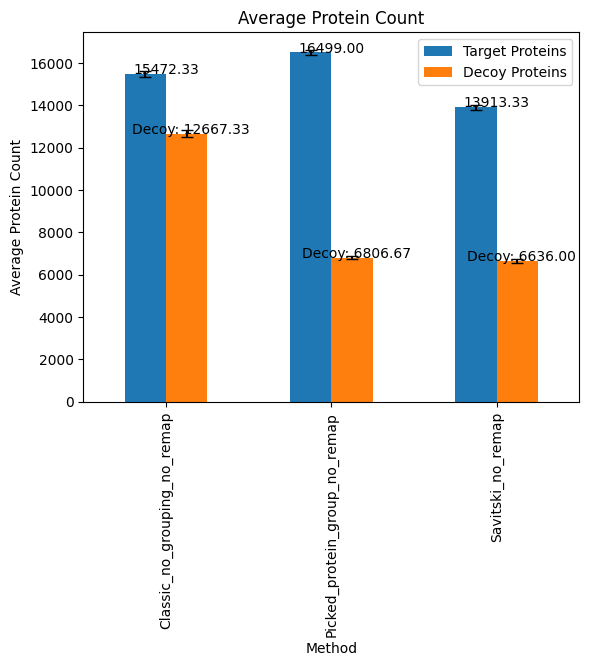

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
data = pd.read_csv('TargetsandDecoyProteinCountRawFilesforPlot.csv')

# group the data by method and take the average of the triplicates
grouped_data = data.groupby(['Method']).mean()

# calculate the standard deviation of the triplicates for each method
std_dev = data.groupby(['Method']).std()

# create a bar chart of the grouped data with error bars
grouped_data.plot(kind='bar', yerr=std_dev, capsize=4)

# add labels to the chart
plt.xlabel('Method')
plt.ylabel('Average Protein Count')
plt.title('Average Protein Count')
for i, val in enumerate(grouped_data['Target Proteins']):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center')
for i, val in enumerate(grouped_data['Decoy Proteins']):
    plt.text(i+0.15, val + 0.1, f"Decoy: {val:.2f}", ha='center')

# display the chart
plt.show()

# Q-value CUTOFF Filter (1% FDR)

In [24]:
import pandas as pd
import os

# Define a list of filenames in the desired order
file_order = ['SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_1.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_2.csv', 
              'SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_3.csv', 
              'SeparateProteinIDsSavitski_no_remap_1000_RANDOM_1.csv',  
              'SeparateProteinIDsSavitski_no_remap_1000_RANDOM_2.csv', 
              'SeparateProteinIDsSavitski_no_remap_1000_RANDOM_3.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_1.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_2.csv', 
              'SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_3.csv', 
             ]

# Create an empty dictionary to store the counts for each file
file_counts = {}

# Set the filter threshold for the Q-value
qvalue_filter = 0.01

# Loop through the filenames in the desired order
for filename in file_order:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename)
        
    # Split the protein type column into two columns
    df[['Protein Type', 'Protein Uniprot']] = df['Protein Type'].str.split('__', n=1, expand=True)

    # Filter the data by Q-value
    df = df[df['Q-value'] <= qvalue_filter]

    # Count the number of target and decoy proteins
    target_count = df['Protein Type'].str.contains('REV').count() - df['Protein Type'].str.contains('REV').sum()
    decoy_count = df['Protein Type'].str.contains('REV').sum()

    # Add the counts to the dictionary
    file_counts[filename] = {'Target Proteins': target_count, 'Decoy Proteins': decoy_count}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame.from_dict(file_counts, orient='index')

# Save the results to a CSV file
results_df.to_csv('TargetsandDecoyProteinCountRawFilesQ-valueFilter.csv')

# Print the results for each file in the desired order
for filename in file_order:
    counts = file_counts[filename]
    print(f'File: {filename}, Target Proteins: {counts["Target Proteins"]}, Decoy Proteins: {counts["Decoy Proteins"]}')

File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_1.csv, Target Proteins: 6029, Decoy Proteins: 59
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_2.csv, Target Proteins: 5954, Decoy Proteins: 58
File: SeparateProteinIDsClassic_no_grouping_no_remap_1000_RANDOM_3.csv, Target Proteins: 6142, Decoy Proteins: 60
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_1.csv, Target Proteins: 6503, Decoy Proteins: 64
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_2.csv, Target Proteins: 6281, Decoy Proteins: 61
File: SeparateProteinIDsSavitski_no_remap_1000_RANDOM_3.csv, Target Proteins: 6499, Decoy Proteins: 64
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_1.csv, Target Proteins: 10025, Decoy Proteins: 99
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_2.csv, Target Proteins: 9973, Decoy Proteins: 99
File: SeparateProteinIDsPicked_protein_group_no_remap_1000_RANDOM_3.csv, Target Proteins: 10133, Decoy Proteins: 100


/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_6238/3737530711.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Method']).mean()
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_6238/3737530711.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_dev = data.groupby(['Method']).std()


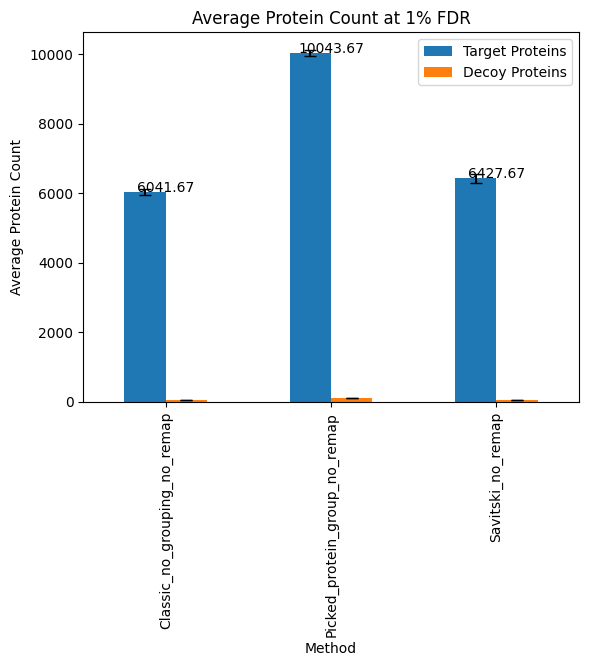

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
data = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/SeparateProteinIDs_1000Files_RANDOM_Analysis/TargetsandDecoyProteinCountRawFilesQ-valueFilterforPlot.csv')

# group the data by method and take the average of the triplicates
grouped_data = data.groupby(['Method']).mean()

# calculate the standard deviation of the triplicates for each method
std_dev = data.groupby(['Method']).std()

# create a bar chart of the grouped data with error bars
grouped_data.plot(kind='bar', yerr=std_dev, capsize=4)

# add labels to the chart
plt.xlabel('Method')
plt.ylabel('Average Protein Count')
plt.title('Average Protein Count at 1% FDR')
for i, val in enumerate(grouped_data['Target Proteins']):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center')
for i, val in enumerate(grouped_data['Decoy Proteins']):
    plt.text(i+0.15, val + 0.1, f"Decoy: {val:.2f}", ha='center')

# display the chart
plt.show()

# Target Proteins at 1% FDR.

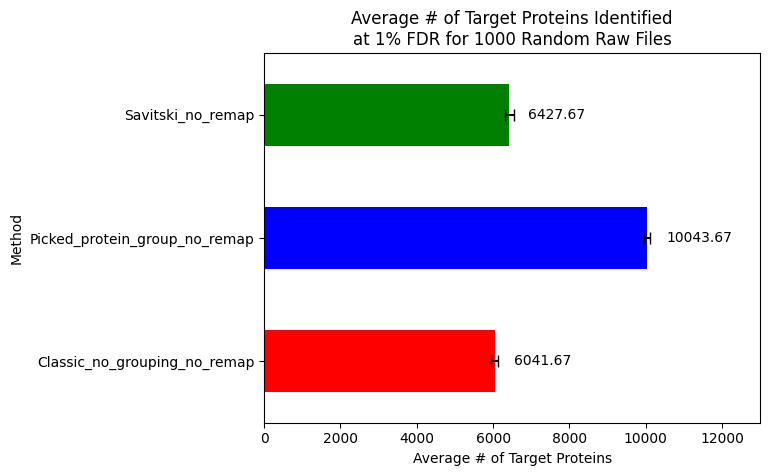

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
data = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/SeparateProteinIDs_1000Files_RANDOM_Analysis/TargetsandDecoyProteinCountRawFilesQ-valueFilterforPlot.csv')

# define colors for each method
colors = {'Savitski_no_remap': 'green', 'Picked_protein_group_no_remap': 'blue', 'Classic_no_grouping_no_remap': 'red'}

# group the data by method and take the average of the target proteins
grouped_data = data.groupby(['Method'])['Target Proteins'].mean()

# calculate the standard deviation of the target proteins for each method
std_dev = data.groupby(['Method'])['Target Proteins'].std()

# create a bar chart of the grouped data with error bars
grouped_data.plot(kind='barh', xerr=std_dev, capsize=4, color=[colors.get(x, 'gray') for x in grouped_data.index])

# add labels to the chart
plt.xlabel('Average # of Target Proteins')
plt.ylabel('Method')
plt.xlim(0, 13000)
plt.title('Average # of Target Proteins Identified\nat 1% FDR for 1000 Random Raw Files')
for i, val in enumerate(grouped_data):
    plt.text(val + 500, i, f"{val:.2f}", va='center')

# display the chart
plt.savefig('average_1000_random_files.png', bbox_inches='tight')
plt.show()

